In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import os
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['mathtime']})
rc('text', usetex=True)

In [3]:
rq1_systems = ["Husky", "AutoRally", "Fetch", "TurtleBot", "Autoware"]
rq1_systems.sort()
print(rq1_systems)

['AutoRally', 'Autoware', 'Fetch', 'Husky', 'TurtleBot']


In [4]:
def getData(name):
    return pd.read_csv(f'data/RQ1A node model recovery results - {name.lower()}.csv')

In [5]:
def calculate(df, name):
    df_no_crash = df.loc[df['crashed'] == False]
    nodes = len(df_no_crash)
    print(f'{name} has {nodes} nodes that did not crash')
    crashed_nodes = len(df) - len(df_no_crash) 
    print(f'{name} crashed in {(1 - len(df_no_crash) / len(df)) * 100}% of the cases')
    api_calls = int(df_no_crash["api_calls"].sum())
    
    unknown_percentage = df_no_crash["unknown_api_calls"].sum() / api_calls * 100
    unknown_nodes_number = len(df.loc[df['unknown_api_calls'] > 0])
    unknown_nodes_percentage = unknown_nodes_number / nodes * 100
    
    print(f'{unknown_nodes_percentage}% of the nodes have at least one unknown API call')
    avg_time_taken = sum(df_no_crash['time_taken']) / len(df_no_crash['time_taken'])
    
    print(f'{name} got {unknown_percentage}% unknowns for API calls (of {api_calls})')
    unreachable_functions = int(df_no_crash["unreachable_functions"].sum())
    unreachable_api_calls = int(df_no_crash["unreachable_api_calls"].sum())
    functions = int(df_no_crash["functions"].sum())
    print(f'{name} has {unreachable_functions} unreachable functions (of {functions}) and {unreachable_api_calls} unreachable API calls')
    df_no_crash["unknown_api_calls"].sum()
    
    return crashed_nodes, unknown_percentage, api_calls, unreachable_functions, unreachable_api_calls, unknown_nodes_number, unknown_nodes_percentage, nodes, functions, avg_time_taken

In [6]:
def process_data(df, name, csv_content, csv_content_, csv_content_2, content):    
    crashed_nodes, unknown_percentage,api_calls, unreachable_functions,unreachable_api_calls,unknown_nodes_number, unknown_nodes_percentage,nodes,functions,avg_time_taken = calculate(df, name)
    unreachable_api_calls_percentage = unreachable_api_calls / api_calls * 100
    unreachable_functions_percentage = unreachable_functions / functions * 100
    content+= f"\\newcommand\\RQI{name}CrashedNodes{{{crashed_nodes}}}\n"
    content+= f"\\newcommand\\RQI{name}AvgTimeTakenSec{{{avg_time_taken:.3f}}}\n"
    content+= f"\\newcommand\\RQI{name}AvgTimeTakenMin{{{avg_time_taken/60:.3f}}}\n"
    content+= f"\\newcommand\\RQI{name}UnkownPercentage{{{unknown_percentage:.3f}}}\n"
    content+= f"\\newcommand\\RQI{name}NodesUnknownPercentage{{{unknown_nodes_percentage:.3f}}}\n"
    content+= f"\\newcommand\\RQI{name}NodesUnknown{{{unknown_nodes_number}}}\n"
    content+= f"\\newcommand\\RQI{name}APICalls{{{api_calls}}}\n"
    content+= f"\\newcommand\\RQI{name}UnreachableFunctions{{{unreachable_functions}}}\n"
    content+= f"\\newcommand\\RQI{name}Functions{{{functions}}}\n"
    content+= f"\\newcommand\\RQI{name}UnreachableFunctionsPercentag{{{unreachable_functions_percentage}}}\n"
    content+= f"\\newcommand\\RQI{name}UnreachableAPICalls{{{unreachable_api_calls}}}\n"
    content+= f"\\newcommand\\RQI{name}UnreachableAPICallsPercentage{{{unreachable_functions_percentage}}}\n"
    content+= f"\\newcommand\\RQI{name}Nodes{{{nodes}}}\n"
    csv_content += f'{name},{api_calls},{unknown_percentage},{unreachable_functions},{unreachable_api_calls}\n'
    csv_content_ += f'{name},{api_calls},{unknown_percentage},{nodes},{unknown_nodes_percentage}\n'
    csv_content_2 += f'{name},{api_calls},{unknown_percentage},{unreachable_functions_percentage:.2f}\% of {functions},{unreachable_api_calls_percentage}\n'
    return csv_content, csv_content_, csv_content_2, content

In [7]:
def hist(s, height):
    h = s.hist(bins=50,figsize=(8,height),ylabelsize=15,xlabelsize=15, color = "black")
    h.set_frame_on(False)
    return h

In [8]:
def histUnknown(df):
    df_no_crash = df.loc[df['crashed'] == False]
    percent_unknown = df_no_crash["unknown_api_calls"] / df_no_crash["api_calls"] * 100
    return hist(percent_unknown, 3)
    

In [9]:
def histUnknownNZ(df):
    df_no_crash = df.loc[df['crashed'] == False]
    percent_unknown = df_no_crash["unknown_api_calls"] / df_no_crash["api_calls"] * 100
    percent_unknown_no_0 = percent_unknown[percent_unknown > 0]    
    return hist(percent_unknown_no_0,1.5)

AutoRally has 25 nodes that did not crash
AutoRally crashed in 3.8461538461538436% of the cases
16.0% of the nodes have at least one unknown API call
AutoRally got 13.333333333333334% unknowns for API calls (of 75)
AutoRally has 4 unreachable functions (of 44) and 10 unreachable API calls
Autoware has 205 nodes that did not crash
Autoware crashed in 10.869565217391308% of the cases
31.70731707317073% of the nodes have at least one unknown API call
Autoware got 14.729574223245109% unknowns for API calls (of 869)
Autoware has 50 unreachable functions (of 354) and 74 unreachable API calls
Fetch has 93 nodes that did not crash
Fetch crashed in 1.0638297872340385% of the cases
1.0752688172043012% of the nodes have at least one unknown API call
Fetch got 1.9417475728155338% unknowns for API calls (of 103)
Fetch has 3 unreachable functions (of 123) and 7 unreachable API calls
Husky has 105 nodes that did not crash
Husky crashed in 4.545454545454541% of the cases
2.857142857142857% of the node

FileNotFoundError: [Errno 2] No such file or directory: 'images/RQ1AHist.pdf'

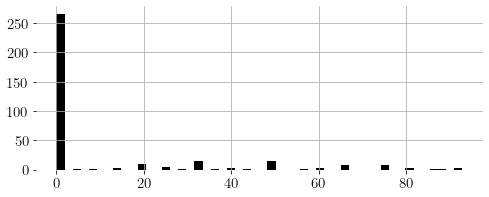

In [10]:
csv_content= "System,API Calls,Percent of Unknown API Calls,Unreachable Functions,Unreachable API Calls\n"
csv_content_= "System,API Calls,Percent of Unknown API Calls,Nodes,Percent of Unknown Nodes\n"
csv_content_2= "System,API Calls,Percent of Unknown API Calls,Nodes,Percent of Unknown Nodes\n"
content= f"\\newcommand\\RQINumSystems{{{len(rq1_systems)}}}\n"

all_dfs = []
for name in rq1_systems:
    df = getData(name)
    all_dfs.append(df)
    csv_content, csv_content_, csv_content_2, content = process_data(df, name, csv_content, csv_content_, csv_content_2, content)

df_all = pd.concat(all_dfs).drop_duplicates(subset=['package','node'])
csv_content, csv_content_, csv_content_2, content = process_data(df_all, "All", csv_content, csv_content_, csv_content_2, content)
with open(f'RQ1_results.tex', 'w') as file:
    file.write(content)
    
with open('data\RQ1A.csv', 'w') as file:
    file.write(csv_content)    
    
with open('data\RQ1Along.csv', 'w') as file:
    file.write(csv_content_)        

with open('data\RQ1Percent.csv', 'w') as file:
    file.write(csv_content_2)            
    
os.makedirs("images")
histUnknown(df_all).figure.savefig('images/RQ1AHist.pdf', bbox_inches='tight')
plt.clf()
histUnknownNZ(df_all).figure.savefig('images/RQ1AHist_nz.pdf', bbox_inches='tight')


In [ ]:
df_observed = pd.read_csv(f'data/RQ1B Observed Architecture - Summary.csv',index_col="Subject").drop(columns=["Case"])
df_observed

In [ ]:
rq2_columnremap = {'# observed':'observed', '# recovered':'recovered', "# obs ! rec":"obs not rec", "# rec ! obs":"rec not obs", "over_approx":"overapprox", "under_approx":"underapprox"}
rq2_headers = ["observed", "recovered", "overapprox", "underapprox"]

In [ ]:
def to_percent(d):
    return (d * 100) 
def over_approx(x):
    if x['observed'] == 0:
        return 0
    else:
        return to_percent(x['rec not obs'] / x['observed'])

def under_approx(x):
    if x['observed'] == 0:
        return 0
    else:
        return to_percent(x['obs not rec'] / x['observed'])

In [ ]:
def process_df_rq2(df):
    #df.rename(columns = rq2_columnremap, inplace = True)
    df['overapprox'] = df.apply(lambda x: over_approx(x), axis=1)
    df['underapprox'] = df.apply(lambda x: under_approx(x), axis=1)
    return df
    

In [ ]:
df_rq2_all = pd.read_csv(f'data/RQ1B Observed Architecture - Node-Level Comparision.csv')
df_rq2_all = df_rq2_all.fillna(0)
df_rq2_all = df_rq2_all[df_rq2_all["Subject"] != 0].copy()
#df_rq2_all['Subject'] = df_rq2_all.apply(lambda x: x['Subject'].capitalize(), axis=1)
    
#df_rq2 = df_rq2_all[df_rq2_all["Case"] == "recovered"]
df_rq2_all.rename(columns = rq2_columnremap, inplace = True)
df_rq2 = df_rq2_all[df_rq2_all["Case"] == "recovered"].groupby(by=["Subject", "Kind"], as_index=False).sum()
df_rq2 = process_df_rq2(df_rq2)
df_rq2

In [ ]:
df_rq2_hw_all = pd.read_csv(f'data/RQ1B Observed Architecture - Comparison.csv')
df_rq2_hw_all = pd.read_csv(f'data/RQ1B Observed Architecture - Comparison.csv')
df_rq2_hw_all = df_rq2_hw_all.fillna(0)
df_rq2_hw_all.rename(columns = rq2_columnremap, inplace = True)
df_rq2_hw_all = df_rq2_hw_all[df_rq2_hw_all["Subject"] != 0].copy()
#df_rq2_hw_all['Subject'] = df_rq2_hw_all.apply(lambda x: x['Subject'].capitalize(), axis=1)
#df_rq2 = df_rq2_all[df_rq2_all["Case"] == "recovered"]
df_rq2_hw = df_rq2_hw_all[df_rq2_hw_all["Case"] == "handwritten"].groupby(by="Subject", as_index=False).sum()

df_rq2_hw = process_df_rq2(df_rq2_hw)


In [ ]:
df_rq2_hw_agg = df_rq2_hw_all.groupby(by=["Kind"], as_index=False).sum()
df_rq2_hw_agg = process_df_rq2(df_rq2_hw_agg)
df_rq2_hw_agg['Subject'] = "All" 
df_rq2_hw_merge = pd.concat([df_rq2_hw, df_rq2_hw_agg.groupby(by=["Subject"], as_index=False).sum()])
#df_rq2_hw_merge = df_rq2_hw_merge.groupby(by=["Subject"], as_index=False).sum()
df_rq2_hw_merge = process_df_rq2(df_rq2_hw_merge)

df_rq2_hw_merge.to_csv('data/RQ2Agghw.csv', index = False, columns=["Subject"]+rq2_headers)
df_rq2_hw_agg.drop(df_rq2_hw_agg[df_rq2_hw_agg.Kind == "Nodes"].index).to_csv('data/RQ2Kindhw.csv', index = False, columns=["Kind"]+rq2_headers)

In [ ]:
df_rq2_models = pd.read_csv(f'data/RQ1B Observed Architecture - Models.csv')
df_rq2_models.fillna('',inplace=True)
df_rq2_models = df_rq2_models.drop_duplicates(subset=['Handwritten Node'])
df_rq2_models

In [ ]:
handwritten_models_total = len(df_rq2_models["Handwritten Node"])
handwritten_models_core = len(df_rq2_models[df_rq2_models["Kind"] == "Core"])
handwritten_models_simulation = len(df_rq2_models[df_rq2_models["Kind"] == "Simulation"])
handwritten_models_python = len(df_rq2_models[df_rq2_models["Reason Used"] == "Python"])
df_rq2_all

In [ ]:
df_rq2_agg = df_rq2_all.groupby(by=["Kind"], as_index=False).sum()
df_rq2_agg = process_df_rq2(df_rq2_agg)
df_rq2_agg['Subject'] = "All" 
df_rq2_agg.to_csv('data/RQ2Kind.csv', index = False, columns=["Kind"] + rq2_headers)
df_rq2_agg

In [ ]:
df_rq2_merge = pd.concat([df_rq2, df_rq2_agg])
df_rq2_merge = df_rq2_merge.groupby(by=["Subject"], as_index=False).sum()
df_rq2_merge = process_df_rq2(df_rq2_merge)
#df_rq2_merge.rename(columns = rq2_columnremap, inplace = True)
df_rq2_merge.to_csv('data/RQ2All.csv', index = False)
df_rq2_merge

In [ ]:
rq2_subjects = list(set(df_rq2["Subject"]))
rq2_subjects.sort()
rq2_subjects

In [ ]:
rq2_subjects_ = rq2_subjects+["All"]

In [ ]:
df_rq_all = df_rq2_merge.groupby(by="Subject").sum()
df_rq_all['overapprox'] = df_rq_all.apply(lambda x: over_approx(x), axis=1)
df_rq_all['underapprox'] = df_rq_all.apply(lambda x: under_approx(x), axis=1)
df_rq_all = df_rq_all.reindex(rq2_subjects+["All"])
df_rq_all.to_csv('data/RQ2Agg.csv', index = True, columns=rq2_headers )
df_rq_all

In [ ]:
content = f"\\newcommand\\RQIITotalHandwrittenModels{{{int(handwritten_models_total)}}}\n"
content += f"\\newcommand\\RQIITotalHandwrittenModelsCore{{{int(handwritten_models_core)}}}\n"
content += f"\\newcommand\\RQIITotalHandwrittenModelsSimulation{{{int(handwritten_models_simulation)}}}\n"
content += f"\\newcommand\\RQIITotalHandwrittenModelsPython{{{int(handwritten_models_python)}}}\n"

for name in rq2_subjects_:
    overapprox = df_rq_all["overapprox"].iloc[df_rq_all.index == name][name]
    content+= f"\\newcommand\\RQII{name}Overapprox{{{overapprox:.3f}}}\n"
    underapprox = df_rq_all["underapprox"].iloc[df_rq_all.index == name][name]
    content+= f"\\newcommand\\RQII{name}Underapprox{{{underapprox:.3f}}}\n"
    handwritten = df_rq_all["#handwritten"].iloc[df_rq_all.index == name][name]
    content+= f"\\newcommand\\RQII{name}Handwritten{{{int(handwritten)}}}\n"
    recovered = df_rq_all["#recovered"].iloc[df_rq_all.index == name][name]
    content+= f"\\newcommand\\RQII{name}Recovered{{{int(recovered)}}}\n"
    if (name != "All"):
        false_positives = df_rq2_all[df_rq2_all["Subject"] == name]["# errors recovered"].max()    
        content+= f"\\newcommand\\RQII{name}FalsePositives{{{int(false_positives)}}}\n"
    
for name in set(df_rq2_agg["Kind"]):
    name_ = name.replace(" ", "")
    overapprox = list(df_rq2_agg[df_rq2_agg["Kind"] == name]["overapprox"])[0]
    content+= f"\\newcommand\\RQII{name_}Overapprox{{{overapprox:.3f}}}\n"
    underapprox = list(df_rq2_agg[df_rq2_agg["Kind"] == name]["underapprox"])[0]
    content+= f"\\newcommand\\RQII{name_}Underapprox{{{underapprox:.3f}}}\n"
print(content)
with open('RQ2_results.tex', 'w') as file:
    file.write(content)  

In [ ]:
df_rq2_all

In [ ]:
df_rq3 = pd.read_csv(f'data/RosTopicBugs - RQ3 - Results Table.csv').drop(columns=["Github commit message", "Reason for non recovery", "Issue"])
df_rq3.fillna('',inplace=True)
df_rq3 = df_rq3.sort_values(by=['Bug'])
df_rq3

In [ ]:
rq3_numBugs = len(df_rq3)
content = f"\\newcommand\\RQIIINumBugs{{{rq3_numBugs}}}\n"

detectInVivo = df_rq3["in-vivo"].value_counts()["x"]
content+= f"\\newcommand\\RQIIIDetectInVivo{{{detectInVivo}}}\n"

detectInVitro = df_rq3["in-vitro"].value_counts()["x"]
content+= f"\\newcommand\\RQIIIDetectInVitro{{{detectInVitro}}}\n"

detectInVitro = df_rq3["in-vitro"].value_counts()["x"]
numDetected = detectInVivo + detectInVitro
content+= f"\\newcommand\\RQIIIDetect{{{numDetected}}}\n"

detectInTheory = df_rq3["in-theory"].value_counts()["x"]
content+= f"\\newcommand\\RQIIIDetectInTheory{{{detectInTheory}}}\n"

undetectable = len(df_rq3) - detectInVivo - detectInVitro - detectInTheory
content+= f"\\newcommand\\RQIIIUndetectable{{{undetectable}}}\n"
    

precision_percent = (numDetected) / rq3_numBugs * 100
content+= f"\\newcommand\\RQIIIPrecisionPercent{{{round(precision_percent)}}}\n"

precision_incl_theory_percent = (numDetected  + detectInTheory) / rq3_numBugs * 100
content+= f"\\newcommand\\RQIIIPrecisionInclTheoryPercent{{{round(precision_incl_theory_percent)}}}\n"


print(content)
with open('RQ3_results.tex', 'w') as file:
    file.write(content)

In [ ]:
def bug_link(x):
    bug_id = x["Bug"]
    bug_link = x["Link"]
    result = "\href{"+bug_link+"}{"+bug_id+"}"
    if x["in-vitro"] == "x":
        result = result+" *"
    return result

In [ ]:
def detectable(x):
    if x["in-vitro"] == "x" or x["in-vivo"] =="x":
            return "\checkmark"
    else:
            return ""
    

In [ ]:
df_rq3_latex = df_rq3.copy()
df_rq3_latex['detected'] = df_rq3_latex.apply(lambda x: detectable(x), axis=1)
df_rq3_latex['Bug'] = df_rq3_latex.apply(lambda x: bug_link(x), axis=1)
df_rq3_latex = df_rq3_latex.replace("x", "\checkmark")
df_rq3_latex.to_csv('data/RQ3.csv', index = False, columns=["Bug", "detected", "in-theory", "Description"])
df_rq3_latex